In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC,SVR,SVC,LinearSVR
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,VotingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
powers = [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
zoomed = np.array(range(1,101))

In [2]:
##svm- supprt vector machine

In [3]:
Logistics regression 

y=b+a1*x1+a2*x2+......+an*xn

Logistics loss->

svm-support vector machine

y=b+a1*x1+a2*x2+......+an*xn

Loss-Hinge Loss

if coreect value is positive category
then loss
if pred>=0 loss=0
otherwise loss = 1-pred

if coreect value is Negative category
then loss
if pred<-1 loss=0
otherwise loss = pred+1


The error  is  contributed by points near the border or wrongly classisfied
=>correction and updation is also due to these points only
=> these points are called support vectors.



y=b+a1*x1+a2*x2+......+an*xn=> -1 and 1

SyntaxError: invalid syntax (<ipython-input-3-479b99c2f2d7>, line 1)

In [ ]:
daibetes =datasets.load_diabetes()
X,y=daibetes.data,daibetes.target

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [8]:
%%time
params_pipe_svc={
               'pca__n_components': range(1,11),
               'linearsvr__C':powers,
}

pipeline = make_pipeline(StandardScaler(),PCA(),LinearSVR())
grid_model=GridSearchCV(pipeline,params_pipe_svc,cv=5,n_jobs=-1)
grid_model.fit(X_train,y_train)


Wall time: 718 ms


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('linearsvr',
                                        LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                                  fit_intercept=True,
                                                 

In [9]:
grid_model.best_params_

{'linearsvr__C': 1000.0, 'pca__n_components': 8}

In [10]:
grid_model.best_score_

0.4559865946308913

In [17]:
%%time
params_pipe_svr={
    'svr__C':powers,
    'svr__gamma':powers
}
pipeline = make_pipeline(SVR())
grid_model = GridSearchCV(pipeline,params_pipe_svr,cv=5,n_jobs=-1)
grid_model.fit(X_train,y_train)

Wall time: 733 ms


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('svr',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'svr__C': [0.0001, 0.001, 0.01, 0.1, 1, 10.0, 100.0,
                                    1000.0, 10000.0],
                         'svr__gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10.0,
                                        100.0, 1000.0, 10000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
     

In [11]:
grid_model.best_params_

{'linearsvr__C': 1000.0, 'pca__n_components': 8}

In [12]:
grid_model.best_score_

0.4559865946308913

In [22]:
grid_model.score(X_test,y_test)

0.4659647332485163

In [ ]:
#DECISION  TREE

In [ ]:
iris=datasets.load_iris()
column1=iris.data[:,0]

In [ ]:
column1

In [ ]:
set1=set(column1)

In [ ]:
len(set1)

In [ ]:
set1

In [13]:
daibetes =datasets.load_diabetes()
X,y=daibetes.data,daibetes.target

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [15]:
%%time
params_dt ={
    'max_depth': range(1,11),
    'min_samples_leaf': range(1,11),
}
model=GridSearchCV(DecisionTreeRegressor(),params_dt,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

Wall time: 419 ms


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None,

In [16]:
model.best_params_

{'max_depth': 3, 'min_samples_leaf': 8}

In [27]:
model.best_score_

0.31038316831771945

In [28]:
model.best_estimator_.feature_importances_

array([0.        , 0.        , 0.70586122, 0.09932966, 0.        ,
       0.02437547, 0.        , 0.        , 0.17043365, 0.        ])

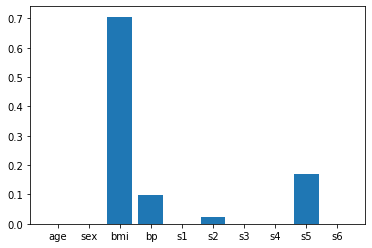

In [29]:
plt.bar(daibetes.feature_names,model.best_estimator_.feature_importances_)
plt.show()

In [30]:
iris=datasets.load_iris()

In [31]:
X,y=iris.data,iris.target

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [33]:
model=GridSearchCV(DecisionTreeClassifier(),params_dt,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 11)},
             pre_dispatch=

In [34]:
model.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [ ]:
model.best_score_

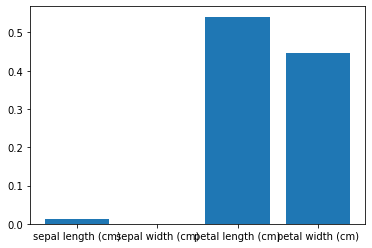

In [35]:
plt.bar(iris.feature_names,model.best_estimator_.feature_importances_)
plt.show()

In [36]:
import random
data = list(range(1,11))

In [37]:
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [38]:
bootsrap_sample=[]
for i in range(10):
    bootsrap_sample.append(random.choice(data))
bootsrap_sample

[5, 7, 9, 4, 10, 10, 2, 8, 7, 10]

In [41]:
foc=datasets.fetch_covtype()

In [42]:
X_train,X_test,y_train,y_test=train_test_split(foc.data,foc.target,
                                               train_size=2000,
                                               test_size=2000,
                                              stratify=foc.target,
                                              random_state=42)

In [43]:
X_train.shape

(2000, 54)

In [44]:
del foc

In [45]:
%%time
params={
    'max_depth':range(1,11),
    'min_samples_leaf':[1],
    'max_features':[54],
}

model=GridSearchCV(RandomForestClassifier(random_state=42,n_estimators=30),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

Wall time: 4.07 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=30, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_de

In [46]:
model.best_params_

{'max_depth': 9, 'max_features': 54, 'min_samples_leaf': 1}

In [47]:
model.best_score_

0.716

In [48]:
model.score(X_test,y_test)

0.736

In [19]:
data = datasets.fetch_covtype()

In [20]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,
                                              test_size=0.3,
                                              stratify=data.target,
                                              random_state=42)

In [21]:
del data

In [5]:
classifiers=(('knn',KNeighborsClassifier()),
             ('svc',SVC()),('dt',DecisionTreeClassifier()))

for name,classifier in classifiers:
    classifier.fit(X_train,y_train)
    print(name,classifier.score(X_test,y_test))

knn 0.66


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


svc 0.4875
dt 0.65


In [8]:
votingclassifier=VotingClassifier(estimators=classifiers)
votingclassifier.fit(X_train,y_train)
print(votingclassifier.score(X_test,y_test))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.648


In [9]:
votingclassifier.predict(X_test)

array([1, 2, 2, ..., 2, 2, 2])

In [ ]:
# votingclassifier

data-same
algorithm-diffrent

# Bagging classfier
 data - bootsrap_sample
 algorithm - same

# random forest - bagging classfier if algorithm is dtt
randomForest


In [10]:
%%time
params={
    'criterion':['entropy','gini'],
    'max_depth':[16],
    'min_samples_leaf':[1],
    'max_features':range(20,31)
}

model=GridSearchCV(RandomForestClassifier(random_state=42,n_estimators=300),params,cv=5,n_jobs=-1)
model.fit(X_train,y_train)

Wall time: 1min 43s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'crite

In [11]:
print(model.best_params_)
print(model.best_score_)
print(model.score(X_test,y_test))

{'criterion': 'entropy', 'max_depth': 16, 'max_features': 29, 'min_samples_leaf': 1}
0.738
0.752


In [23]:
model=RandomForestClassifier(criterion='entropy',max_depth=16,max_features=22,min_samples_leaf=1,
                                                      n_estimators=30,n_jobs=-1)

In [24]:
%%time
model.fit(X_train,y_train)

Wall time: 34 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
model.score(X_test,y_test)

0.9028880576464109

In [26]:
model.score(X_train,y_train)

0.9237290636033715

In [ ]:
#GRADIENT BOOST

correct values    prediction

10                8     -2
20                24    -4
30                35    -5

input_features  
-2                 1
-4                -6
-5                -3

input_features
1
2
-2

dont take all rows in errors columns
minimize the feature column

In [27]:
data = datasets.fetch_covtype()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,
                                              train_size=2000,
                                              test_size=2000,
                                              stratify=data.target,
                                              random_state=42)

del data

In [45]:
params_gb={
    
    'learning_rate':[0.1],
    'subsample':[1],
    'max_depth':[4],
    'min_samples_leaf':range(1,11),
    'max_features':[31]
    
    
}


model=GridSearchCV(GradientBoostingClassifier(),params_gb,cv=5,n_jobs=-1)


In [46]:
%%time
model.fit(X_train,y_train)

Wall time: 27.8 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [47]:
print(model.best_params_)
print(model.best_score_)
print(model.score(X_test,y_test))

{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 31, 'min_samples_leaf': 5, 'subsample': 1}
0.7165
0.732


In [49]:
data = datasets.fetch_covtype()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,
                                              test_size=0.3,
                                              stratify=data.target,
                                              random_state=42)

del data

In [50]:
%%time
model=GradientBoostingClassifier(n_estimators=100,max_depth=4,max_features=31,random_state=42)
model.fit(X_train,y_train)

Wall time: 16min 49s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=31, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8019709472152011
0.7984899944923811
